## Deep Learning Model


### Model Pseudocode

In [ ]:
# Function create_cnn_model(input_shape):

#     Initialize Sequential model

#     Add Conv1D(32, kernel=3, padding='same', input_shape)
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)
#     Add MaxPooling1D(pool=2)

#     Add Conv1D(64, kernel=3, padding='same')
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)
#     Add MaxPooling1D(pool=2)

#     Add Conv1D(128, kernel=3, padding='same')
#     Add BatchNormalization
#     Add LeakyReLU(α=0.3)

#     Add GlobalAveragePooling1D

#     Add Dense(64) → BatchNormalization → LeakyReLU(α=0.3)
#     Add Dropout(0.25)

#     Add Output Dense(1, activation='sigmoid')

#     Compile model with:
#         optimizer = 'adam'
#         loss = 'binary_crossentropy'
#         metrics = ['accuracy']

#     Return model



### Step 1: Load and Prepare the Dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('D:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\Data\K5_Dataset.csv')
X = df.drop('Label', axis=1).values
y = df['Label'].values
X = X.reshape(X.shape[0], X.shape[1], 1)

# Flatten before scaling and reshape after
X_flat = X.reshape(X.shape[0], X.shape[1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_flat)

# Reshape back to 3D for CNN input
X = X_scaled.reshape(X.shape[0], X.shape[1], 1)

### Step 2: Defining the 1D CNN Architecture

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, LeakyReLU

def create_cnn_model(input_shape):
    model = Sequential()

    model.add(Conv1D(32, kernel_size=3, padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(64, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(128, kernel_size=3, padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))

    model.add(GlobalAveragePooling1D())

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.3))
    model.add(Dropout(0.25))  # Moderate regularization

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


##Initttaaallll Modelll
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

# def create_improved_cnn_model(input_shape):
#     model = Sequential([
#         Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
#         BatchNormalization(),
#         MaxPooling1D(pool_size=2),

#         Conv1D(128, kernel_size=3, activation='relu'),
#         BatchNormalization(),
#         MaxPooling1D(pool_size=2),

#         Conv1D(256, kernel_size=3, activation='relu'),
#         BatchNormalization(),

#         Flatten(),
#         Dense(128, activation='relu'),
#         Dropout(0.3),  # Less aggressive than 0.5
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')  # Binary classification
#     ])

#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model



### Step 3: Training the Model using the K-Folds

In [14]:
accuracies = []
all_y_true = []
all_y_pred = []
all_y_scores = []

for fold in range(0, 5):  
    print(f"Training on Fold {fold}...")

    train_idx = df[df['Fold'] != fold].index
    test_idx = df[df['Fold'] == fold].index

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = create_cnn_model(input_shape=X.shape[1:])

    history = model.fit(
        X_train, y_train,
        epochs=30,
        batch_size=64,
        validation_data=(X_test, y_test),
        verbose=1
    )

    # Evaluate on the test fold
    y_scores = model.predict(X_test).ravel()
    y_pred = (y_scores > 0.5).astype(int)

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    all_y_scores.extend(y_scores)

    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(acc)
    print(f"Fold {fold} Accuracy: {acc:.4f}")



Training on Fold 0...
Epoch 1/30


d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
d:\Coding Projects\Detection-of-SYN-Flood-Attacks-Using-Machine-Learning-and-Deep-Learning-Techniques-with-Feature-Base\syn\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9811 - loss: 0.0712 - val_accuracy: 0.5154 - val_loss: 0.9094
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0266 - val_accuracy: 0.5154 - val_loss: 1.0856
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0271 - val_accuracy: 0.5154 - val_loss: 0.7379
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0324
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9986 - loss: 0.0068 - val_accuracy: 1.0000 - val_loss: 0.0801
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9918 - loss: 0.0358 - val_accuracy: 0.9995 - val_loss: 0.0728
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0112 - val_accuracy: 1.0000 - val_

### Step 4: Evaluation 

In [15]:
import numpy as np

print("\nFinal CNN Cross-Validation Results:")
print(f"Fold Accuracies: {accuracies}")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Standard Deviation: {np.std(accuracies):.4f}")


Final CNN Cross-Validation Results:
Fold Accuracies: [1.0, 0.99843829870224, 0.9973971843719482, 0.9953149557113647, 0.9984375238418579]
Mean Accuracy: 0.9979
Standard Deviation: 0.0015


### Step 5: Visual Evaluation  

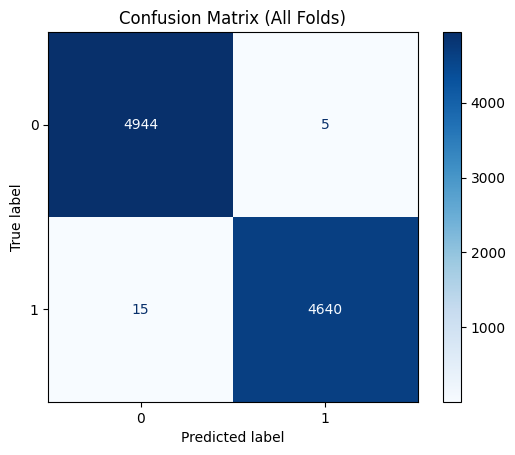

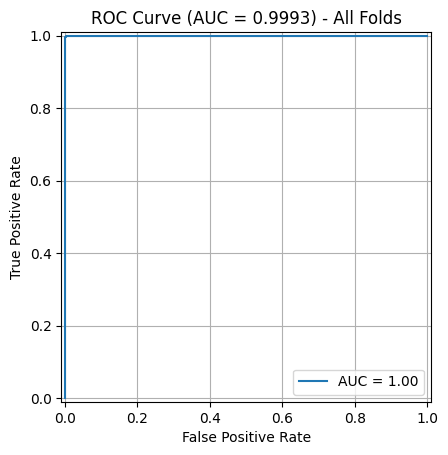

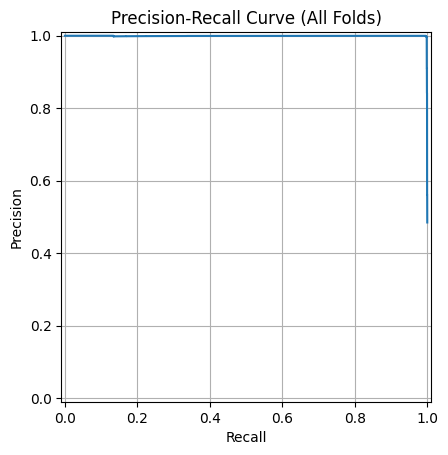

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    RocCurveDisplay,
    precision_recall_curve,
    PrecisionRecallDisplay
)

# Confusion Matrix
cm = confusion_matrix(all_y_true, all_y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_cm.plot(cmap='Blues')
plt.title('Confusion Matrix (All Folds)')
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(all_y_true, all_y_scores)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title(f'ROC Curve (AUC = {roc_auc:.4f}) - All Folds')
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(all_y_true, all_y_scores)
PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.title('Precision-Recall Curve (All Folds)')
plt.grid(True)
plt.show()
